## RETO 
# DESCARGAMOS EL ARCHIVO DEL REPOSITORIO KAGGEL QUE SE ENCUENTRA EN EL SIGUIENTE LINK 
[Bitcoin Transaction Fraud Detection](https://www.kaggle.com/code/nabanichowdhury/bitcoin-transaction-fraud-detection/input?select=BitcoinHeistData.csv)

In [1]:
import pandas as pd

# Cargando el dataset

In [ ]:

df = pd.read_csv("/workspaces/Practica3_GR_6/BitcoinHeistData.csv")

In [26]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


# VERIFICAMOS SI HAY NULOS EN EL DATA SET DE KAGGEL

In [27]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [28]:
# Dimensión del archivo
print(df.shape)

(126, 10)


LEVANTAMOS UNA BASE DE DATOS POSTGRESS DENTRO DE UN DV CONTAINER 

In [6]:
import psycopg2
import pandas as pd  # Para manejar el DataFrame

# Cargar el archivo CSV
df = pd.read_csv("/workspaces/Practica3_GR_6/BitcoinHeistData.csv")
print(df.head())  # Verifica que el DataFrame tiene los datos correctos

# Paso 1: Crear la base de datos y la tabla desde Python
def create_database_and_table():
    try:
        # Conexión al servidor PostgreSQL (sin especificar una base de datos)
        conn = psycopg2.connect(
            user="postgres",  # Usuario predeterminado
            password="postgres",
            host="localhost",
            port="5432"
        )
        conn.autocommit = True  # Necesario para crear una base de datos
        cursor = conn.cursor()

        # Crear la base de datos "postgres_kevin" si no existe
        cursor.execute("SELECT datname FROM pg_database WHERE datname='postgres_kevin';")
        if not cursor.fetchone():
            cursor.execute("CREATE DATABASE postgres_kevin;")
            print("Base de datos 'postgres_kevin' creada correctamente.")
        else:
            print("La base de datos 'postgres_kevin' ya existe.")

        # Cerrar la conexión inicial
        cursor.close()
        conn.close()

        # Conectar a la base de datos "postgres_kevin"
        conn = psycopg2.connect(
            database="postgres_kevin",  # Usar el nombre de la base de datos correcta
            user="postgres",
            password="postgres",
            host="localhost",
            port="5432"
        )
        cursor = conn.cursor()

        cursor.execute("DROP TABLE IF EXISTS structured_logs;")

        # Crear la tabla "structured_logs" con las columnas proporcionadas
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS structured_logs (
            id SERIAL PRIMARY KEY,
            address VARCHAR(255),
            year INTEGER,
            day INTEGER,
            length INTEGER,
            weight INTEGER,
            count INTEGER,
            looped INTEGER,
            neighbors INTEGER,
            income INTEGER,
            label VARCHAR(100)
        );
        """)
        print("Tabla 'structured_logs' creada correctamente.")

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al crear la base de datos o la tabla: {e}")

# Paso 2: Insertar datos estructurados en la tabla
def insert_structured_logs(df):
    try:
        # Conectar a la base de datos
        conn = psycopg2.connect(
            database="postgres_kevin",  # Usar la base de datos correcta
            user="postgres",
            password="postgres",
            host="localhost",
            port="5432"
        )
        cursor = conn.cursor()

        # Verificar cuántos registros se van a insertar
        print(f"Inserting {len(df)} records into the database.")

        # Insertar los registros en la tabla
        cursor.executemany("""
            INSERT INTO structured_logs (address, year, day, length, weight, count, looped, neighbors, income, label)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """, df[["address", "year", "day", "length", "weight", "count", "looped", "neighbors", "income", "label"]].values.tolist())

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        print("Datos estructurados insertados correctamente.")
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al insertar datos estructurados: {e}")

if __name__ == "__main__":
    create_database_and_table()  # Crear base de datos y tabla

    # Asegúrate de que el archivo CSV tiene las columnas correctas antes de insertar
    insert_structured_logs(df)  # Pasa el dataframe df a la función


                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  
0       0          2  100050000.0  princetonCerber  
1       0          1  100000000.0   princetonLocky  
2       0          2  200000000.0  princetonCerber  
3       0          2   71200000.0  princetonCerber  
4       0          1  200000000.0   princetonLocky  
La base de datos 'postgres_kevin' ya existe.
Tabla 'structured_logs' creada correctamente.
Inserting 126 records into the database.
Datos estructurados insertados correctamente.


In [8]:
import psycopg2

# Conectar a la base de datos
conn = psycopg2.connect(
    database="postgres_kevin",  # Usar la base de datos correcta
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Ejecutar la consulta SQL para obtener los primeros 10 registros
cursor.execute("SELECT * FROM structured_logs LIMIT 10;")
records = cursor.fetchall()

# Mostrar los registros obtenidos
for record in records:
    print(record)

# Cerrar la conexión
cursor.close()
conn.close()

(1, '111K8kZAEnJg245r2cM6y9zgJGHZtJPy6', 2017, 11, 18, 0, 1, 0, 2, 100050000, 'princetonCerber')
(2, '1123pJv8jzeFQaCV4w644pzQJzVWay2zcA', 2016, 132, 44, 0, 1, 0, 1, 100000000, 'princetonLocky')
(3, '112536im7hy6wtKbpH1qYDWtTyMRAcA2p7', 2016, 246, 0, 1, 1, 0, 2, 200000000, 'princetonCerber')
(4, '1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7', 2016, 322, 72, 0, 1, 0, 2, 71200000, 'princetonCerber')
(5, '1129TSjKtx65E35GiUo4AYVeyo48twbrGX', 2016, 238, 144, 0, 456, 0, 1, 200000000, 'princetonLocky')
(6, '112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc', 2016, 96, 144, 0, 2821, 0, 1, 50000000, 'princetonLocky')
(7, '112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1', 2016, 225, 142, 0, 881, 0, 2, 100000000, 'princetonCerber')
(8, '112eFykaD53KEkKeYW9KW8eWebZYSbt2f5', 2016, 324, 78, 0, 1, 0, 2, 100990000, 'princetonCerber')
(9, '112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep', 2016, 298, 144, 2, 4220, 0, 2, 80000000, 'princetonCerber')
(10, '112GocBgFSnaote6krx828qaockFraD8mp', 2016, 62, 112, 0, 1, 0, 1, 50000000, 'princetonLocky')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Gráfico de barras para el número de muestras por tipo de malware

label
princetoncerber    6
princetonlocky     4
Name: count, dtype: int64


/tmp/ipykernel_66972/355970715.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/tmp/ipykernel_66972/355970715.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df_filtered, palette="coolwarm")


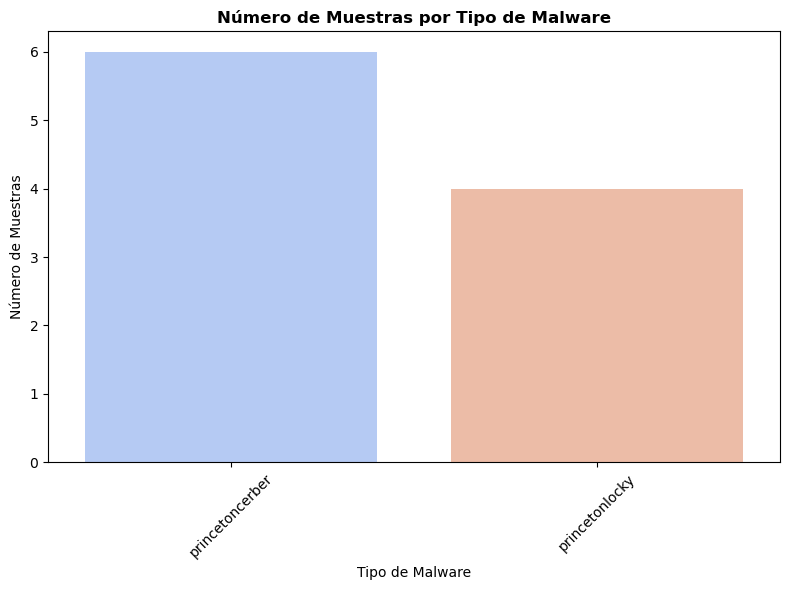

In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
def fetch_data_from_db():
    try:
        # Conectar a la base de datos
        conn = psycopg2.connect(
            database="postgres_kevin",  # Usar la base de datos correcta
            user="postgres",
            password="postgres",
            host="localhost",
            port="5432"
        )
        
        # Hacer una consulta SQL para obtener los datos
        query = "SELECT * FROM structured_logs;"
        df = pd.read_sql_query(query, conn)
        
        # Cerrar la conexión a la base de datos
        conn.close()
        
        return df

    except Exception as e:
        print(f"Error al obtener datos de la base de datos: {e}")
        return None

# Paso 1: Obtener los datos de la base de datos
df1 = fetch_data_from_db()

if df1 is not None:
    # Paso 2: Eliminar espacios en blanco antes y después de los nombres de malware
    df1['label'] = df1['label'].str.strip().str.lower()

    # Paso 3: Seleccionar solo las primeras 10 filas
    df_first_10 = df1.head(10)

    # Paso 4: Filtrar solo los dos tipos de malware relevantes: 'princetoncerber' y 'princetonlocky' en las primeras 10 muestras
    df_filtered = df_first_10[df_first_10['label'].isin(['princetoncerber', 'princetonlocky'])]

    # Paso 5: Verificar cuántas muestras hay de cada tipo de malware después del filtrado
    print(df_filtered['label'].value_counts())

    # Paso 6: Gráfico de barras para el número de muestras por tipo de malware
    plt.figure(figsize=(8, 6))
    sns.countplot(x="label", data=df_filtered, palette="coolwarm")
    plt.title("Número de Muestras por Tipo de Malware", fontsize=12, fontweight="bold")
    plt.xlabel("Tipo de Malware")
    plt.ylabel("Número de Muestras")
    plt.xticks(rotation=45)  # Para mejorar la visualización de las etiquetas
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo obtener información de la base de datos.")


### 2. Gráfico de distribución: Días en los que se detectaron los eventos

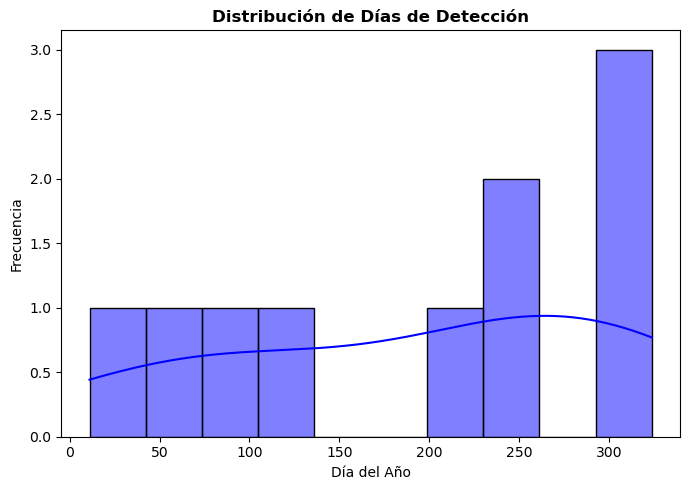

In [7]:

# Seleccionar solo las primeras 10 filas
df_first_10 = df1.head(10)

# 2. Gráfico de distribución: Días en los que se detectaron los eventos
plt.figure(figsize=(7, 5))
sns.histplot(df_first_10["day"], bins=10, kde=True, color="blue")
plt.title("Distribución de Días de Detección", fontsize=12, fontweight="bold")
plt.xlabel("Día del Año")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### 3. Gráfico de dispersión: Relación entre la cantidad de vecinos y los ingresos

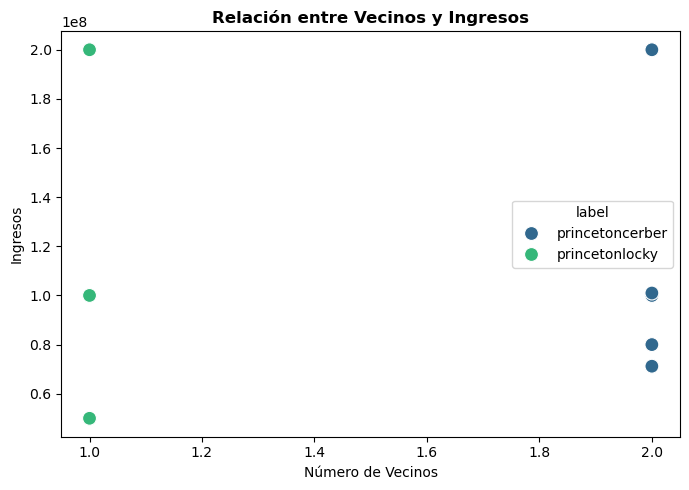

In [6]:
# Seleccionar solo las primeras 10 filas
df_first_10 = df1.head(10)

# 3. Gráfico de dispersión: Relación entre la cantidad de vecinos y los ingresos
plt.figure(figsize=(7, 5))
sns.scatterplot(x="neighbors", y="income", hue="label", data=df_first_10, palette="viridis", s=100)
plt.title("Relación entre Vecinos y Ingresos", fontsize=12, fontweight="bold")
plt.xlabel("Número de Vecinos")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

### 4. Boxplot: Distribución del peso del malware por etiqueta

/tmp/ipykernel_66972/4219976050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="weight", data=df_first_10, palette="muted")


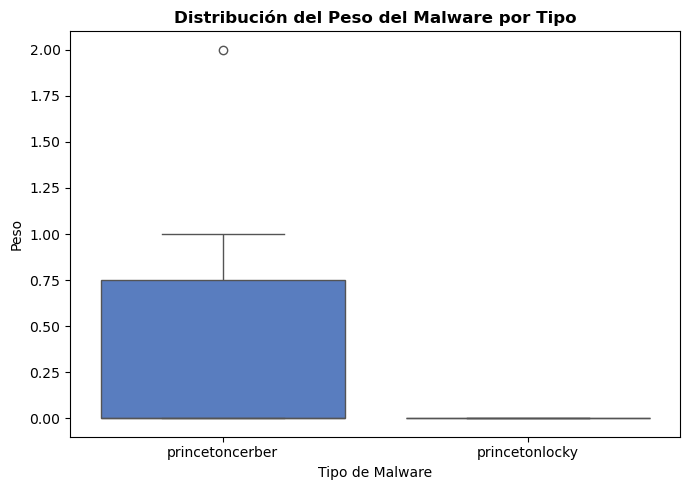

In [5]:

# Seleccionar solo las primeras 10 filas
df_first_10 = df1.head(10)

# 4. Boxplot: Distribución del peso del malware por etiqueta
plt.figure(figsize=(7, 5))
sns.boxplot(x="label", y="weight", data=df_first_10, palette="muted")
plt.title("Distribución del Peso del Malware por Tipo", fontsize=12, fontweight="bold")
plt.xlabel("Tipo de Malware")
plt.ylabel("Peso")
plt.tight_layout()
plt.show()